## 第三节 全微分

### 一、全微分的定义

由偏导数的定义知道，二元函数对某个自变量的偏导数表示当另一个自变量固定时，因变量相对于该自变量的变化率，根据一元函数微分学中增量与微分的关系,可得

$$
\begin{align}
f(x+\Delta x, y)-f(x,y) \approx f_x(x,y)\Delta x, \\
f(x,y+\Delta y)-f(x,y)≈f_y(x,y)\Delta y.
\end{align}
$$

上面两式的左端分别叫做二元函数对$x$和对$y$的**偏增量**，而右端分别叫做二元函数对$x$和对$y$的**偏微分**.

在实际问题中,有时需要研究多元函数中各个自变量都取得增量时因变量所获得的增量，即所谓全增量的问题。

下面以二元函数为例进行讨论.  
设函数$z=f(x,y)$在点$P(x,y)$的某邻域内有定义，$P(x+\Delta x,y+ \Delta y)$为这邻域内的任意一点,则称这两点的函数值之差$f(x+\Delta x,y+ \Delta y)-f(x,y)$为函数在点$P$对应于自变量增量$\Delta x$和$\Delta y$的**全增量**,记作$\Delta z$,即

9


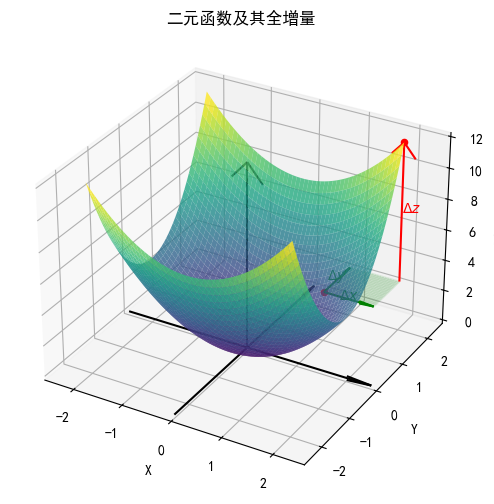

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 创建3D图形
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 定义二元函数
def f(x, y):
    return x**2 + 2*y**2  # 举例：这里定义了一个简单的二次函数

# 计算方向导数
def fxy(a, b):
    fx = 2 * a
    fy = 4 * b
    return fx, fy

# 生成数据
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 绘制二元函数曲面
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# (x0,y0)
x_0 = 1
y_0 = 1

# delta_x, delta_y, delta_z
delta_x = 1
delta_y = 1
delta_z = f(x_0+delta_x, y_0+delta_y) - f(x_0, y_0)
print(delta_z)
ax.quiver(x_0+delta_x, y_0+delta_y, f(x_0,y_0) ,0,0, delta_z, color="r", arrow_length_ratio=0.1, alpha=1) # delta_z
ax.text(x_0+delta_x, y_0+delta_y,f(x_0,y_0)+delta_z/2, r"$\Delta z$", color="r", alpha=1)


# 点 (x0,y0,f(x0,y0))
ax.scatter(x_0, y_0, f(x_0,y_0), color="r")
# 点 (x1,y1,f(x1,y1))
ax.scatter(x_0+delta_x, y_0+delta_y, f(x_0+delta_x, y_0+delta_y), color="r")

# 偏导数 (x_0)
fx0, fy0 = fxy(x_0, y_0) 

# 全微分可视化
# delta_x
ax.quiver(1,1,f(1,1),delta_x,0,0, color="g", arrow_length_ratio=0.3) 
ax.text(1.5,1,f(1,1), r"$\Delta x$",color="g", ha="center") # delta x可视化

# delta_y
ax.quiver(1,1,f(1,1),0,delta_y,0, color="g", arrow_length_ratio=0.3) 
ax.text(1,1.5,f(1,1), r"$\Delta y$",color="g", ha="center") # delta y可视化


# 自定义坐标轴
# ax.quiver(0,0,0,0,0,12, color="k",arrow_length_ratio=0.1)
# ax.quiver(-2,0,0,4,0,0, color="k", arrow_length_ratio=0.1)
# ax.quiver(0,-2,0,0,4,0, color="k",arrow_length_ratio=0.1)
ax.quiver([0,-2.5,0],[0,0,-2.5],[0,0,0], [0,5,0], [0,0,5], [12,0,0], arrow_length_ratio=0.1, color="k") # 上述三行代码简写


grid_x = np.linspace(1,2,20)
grid_y = np.linspace(1,2,20)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)
ax.plot_wireframe(grid_x, grid_y, np.full((20,20),f(x_0, y_0)), color="g", alpha=0.1)


# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_zlim(0,12)
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
# ax.set_aspect("equal")
# 设置标题
plt.title('二元函数及其全增量')

plt.show()

一般说来,计算全增量$\Delta z$比较复杂，与一元函数的情形一样，我们希望用自变量的增量$\Delta x、\Delta y$的线性函数来近似地代替函数的全增量$\Delta z$，从而引人如下定义.

**定义**   
**设函数$z=f(x,y)$在点(x,y)的某邻域内有定义，如果函数在点$(x,y)$的全增量
$$
\Delta z=f(x+\Delta x,y+ \Delta y)-f(x,y)
$$
可表示为
$$
\Delta z=A\Delta x+B\Delta y+o(p) \tag{3-2}
$$, 
其中$A$和$B$不依赖于$\Delta x$和$\Delta y$而仅与$x$和$y$有关，$\rho=\sqrt{(\Delta x)^2+(\Delta y)^2}$，那么称函数$z=f(x,y)$在点$(x,y)$可微分，而$A\Delta x+B\Delta y$称为函数$z=f(x,y)$在点$(x,y)$的`全微分`，记作$dz$，即
$dz=A \Delta x + B \Delta y$。如果函数在区域$D$内各点处都可微分，那么称这函数在$D$内可微分。**

9
6
3


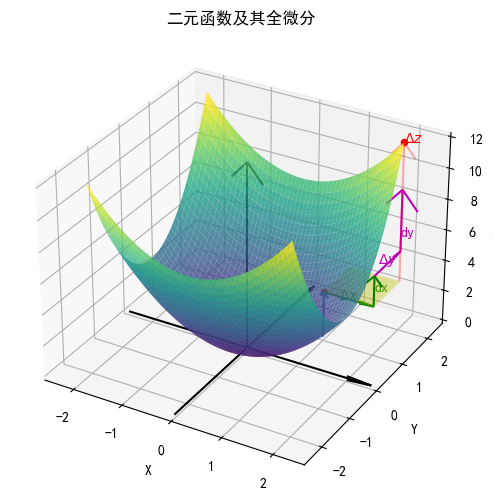

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 创建3D图形
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 定义二元函数
def f(x, y):
    return x**2 + 2*y**2  # 举例：这里定义了一个简单的二次函数

# 计算方向导数
def fxy(a, b):
    fx = 2 * a
    fy = 4 * b
    return fx, fy

# 生成数据
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 绘制二元函数曲面
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# (x0,y0)
x_0 = 1
y_0 = 1

# delta_x, delta_y, delta_z
delta_x = 1
delta_y = 1
delta_z = f(x_0+delta_x, y_0+delta_y) - f(x_0, y_0)
print(delta_z)
ax.quiver(x_0+delta_x, y_0+delta_y, f(x_0,y_0) ,0,0, delta_z, color="r", arrow_length_ratio=0.1, alpha=0.3) # delta_z
ax.text(x_0+delta_x, y_0+delta_y,f(x_0,y_0)+delta_z, r"$\Delta z$", color="r", alpha=1)


# 点 (x0,y0,f(x0,y0))
ax.scatter(x_0, y_0, f(x_0,y_0), color="r")
# 点 (x1,y1,f(x1,y1))
ax.scatter(x_0+delta_x, y_0+delta_y, f(x_0+delta_x, y_0+delta_y), color="r")

# 偏导数 (x_0)
fx0, fy0 = fxy(x_0, y_0) 
# 全微分
dz = fx0 * delta_x + fy0 * delta_y 
print(dz)
print(delta_z-dz)

# dz 可视化
# ax.quiver(2.03,2.03,f(1,1),0,0,dz, color="y", arrow_length_ratio=0.1) # dz

# 全微分可视化
# delta_x
ax.quiver(1,1,f(1,1),delta_x,0,0, color="g", arrow_length_ratio=0.3) 
dx = fx0 * delta_x  # dx
ax.quiver(2,1, f(1,1), 0, 0, dx, color="g") # dx可视化 
ax.text(2,1,f(1,1)+dx/2, "dx", color="g") # dx text
ax.text(1.5,1,f(1,1), r"$\Delta x$",color="g", ha="center") # delta x可视化

# delta_y
ax.quiver(2,1,f(1,1)+dx ,0,1,0, color="m", arrow_length_ratio=0.3)  
dy = fy0 * delta_y # dy
ax.quiver(2,2, f(1,1)+dx, 0,0, dy, color="m") # dy可视化
ax.text(2,2,f(1,1)+(dx+dy)/2, "dy", color="m") # dy text
# ax.text(2,1.5,f(1,1), r"$\Delta y$",color="m", ha="center") # delta y可视化
ax.text(2,1.5,f(1,1)+dx, r"$\Delta y$",color="m", ha="center") # delta y可视化

ax.quiver(1,1,0,0,0,f(1,1), arrow_length_ratio=0.1)

# 自定义坐标轴
# ax.quiver(0,0,0,0,0,12, color="k",arrow_length_ratio=0.1)
# ax.quiver(-2,0,0,4,0,0, color="k", arrow_length_ratio=0.1)
# ax.quiver(0,-2,0,0,4,0, color="k",arrow_length_ratio=0.1)
ax.quiver([0,-2.5,0],[0,0,-2.5],[0,0,0], [0,5,0], [0,0,5], [12,0,0], arrow_length_ratio=0.1, color="k") # 上述三行代码简写


grid_x = np.linspace(1,2,20)
grid_y = np.linspace(1,2,20)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)
ax.plot_wireframe(grid_x, grid_y, np.full((20,20),f(x_0, y_0)), color="y", alpha=0.2)


# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_zlim(0,12)
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
# ax.set_aspect("equal")
# 设置标题
plt.title('二元函数及其全微分')

plt.show()